In [1]:
import io
%cd "E:\Imarticus\PGA18\PYTHON"

E:\Imarticus\PGA18\PYTHON


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
vaccinetrain=pd.read_csv("training_set_features.csv")

In [4]:
vaccinetest=pd.read_csv("test_set_features.csv")

In [5]:
labels=pd.read_csv("training_set_labels.csv")

In [6]:
#imputed data from R .using MICE
#excluded one variable(respondent_id)
impdata=pd.read_csv("impute.csv")

In [7]:
print(vaccinetrain.shape)
print(vaccinetest.shape)
print(impdata.shape)

(26707, 36)
(26708, 36)
(53415, 35)


In [8]:
vaccinetrainclean=impdata.loc[0:26706,]
vaccinetestclean=impdata.loc[26707:53414,]

In [9]:
vaccinetrainclean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0,0,arjwrbjb,hfxkjkmi
1,3,2,0,1,0,1,0,1,1,0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0,0,pxcmvdjn,xgwztkwe
2,1,1,0,1,0,0,0,0,0,0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2,0,rucpziij,xtkaffoo
3,1,1,0,1,0,1,1,0,0,0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0,0,fcxhlnwr,oijqvulv
4,2,1,0,1,0,1,1,0,1,0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1,0,wxleyezf,emcorrxb


In [10]:
vaccinetestclean.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26707,2,2,0,1,0,1,1,0,1,0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1,0,atmlpfrs,hfxkjkmi
26708,1,1,0,0,0,0,0,0,0,0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3,0,atmlpfrs,xqwwgdyp
26709,2,2,0,0,1,1,1,1,1,0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1,0,nduyfdeo,pvmttkik
26710,1,1,0,0,0,0,0,0,0,1,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1,0,xicduogh,kldqjyjy
26711,3,1,1,1,0,1,1,1,1,0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0,1,fcxhlnwr,mxkfnird


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le=LabelEncoder()

In [13]:
vaccinetraindummy=vaccinetrainclean.apply(le.fit_transform)

In [14]:
vaccinetestdummy=vaccinetestclean.apply(le.fit_transform)

In [15]:
vaccinetraindummy.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,0,7
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,12,19
2,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,9,0,2,0,14,21
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,4,11
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,18,5


In [16]:
vaccinetestdummy.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26707,2,2,0,1,0,1,1,0,1,0,...,1,1,1,0,7,0,1,0,1,7
26708,1,1,0,0,0,0,0,0,0,0,...,2,1,1,0,1,2,3,0,1,20
26709,2,2,0,0,1,1,1,1,1,0,...,1,0,0,0,5,2,1,0,10,12
26710,1,1,0,0,0,0,0,0,0,1,...,0,0,0,1,5,0,1,0,19,9
26711,3,1,1,1,0,1,1,1,1,0,...,0,1,0,0,6,2,0,1,4,10


In [17]:
vaccinetraindummy=pd.DataFrame(vaccinetraindummy)

In [18]:
vaccinetraindummy.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1,0,0,0,0,0,0,1,1,0,...,2,1,0,1,8,2,0,0,0,7
1,3,2,0,1,0,1,0,1,1,0,...,2,1,1,0,1,0,0,0,12,19
2,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,9,0,2,0,14,21
3,1,1,0,1,0,1,1,0,0,0,...,2,1,1,1,5,1,0,0,4,11
4,2,1,0,1,0,1,1,0,1,0,...,0,0,0,0,9,0,1,0,18,5


In [19]:
vaccinetestdummy=pd.DataFrame(vaccinetestdummy)

In [20]:
vaccinetestdummy.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26707,2,2,0,1,0,1,1,0,1,0,...,1,1,1,0,7,0,1,0,1,7
26708,1,1,0,0,0,0,0,0,0,0,...,2,1,1,0,1,2,3,0,1,20
26709,2,2,0,0,1,1,1,1,1,0,...,1,0,0,0,5,2,1,0,10,12
26710,1,1,0,0,0,0,0,0,0,1,...,0,0,0,1,5,0,1,0,19,9
26711,3,1,1,1,0,1,1,1,1,0,...,0,1,0,0,6,2,0,1,4,10


LOGISTIC REGRESSION

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.metrics import classification_report

In [23]:
logit=LogisticRegression(max_iter=10000)

In [24]:
X=vaccinetraindummy
y=labels.seasonal_vaccine

In [25]:
logitmodel=logit.fit(X,y)

In [26]:
logitmodel.score(X,y)

0.7732804133747707

In [27]:
logitpredict=logitmodel.predict(X)

In [28]:
pd.crosstab(y,logitpredict)

col_0,0,1
seasonal_vaccine,,
0,11530,2742
1,3313,9122


In [29]:
(11530+9122)/(11530+2742+3313+9122)
#Accuracy is 77.32

0.7732804133747707

In [30]:
logitpredicttest=logitmodel.predict(vaccinetestdummy)

In [31]:
logitpredicttest

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
tree=DecisionTreeClassifier(max_depth=10)

In [34]:
treemodel=tree.fit(X,y)

In [35]:
treemodel.score(X,y)

0.813906466469465

In [36]:
treepredict=treemodel.predict(X)

In [37]:
print(classification_report(y,treepredict))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     14272
           1       0.80      0.80      0.80     12435

    accuracy                           0.81     26707
   macro avg       0.81      0.81      0.81     26707
weighted avg       0.81      0.81      0.81     26707



In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
cross_val_score(tree,X,y,cv=5)

array([0.74241857, 0.73549232, 0.75716158, 0.74967235, 0.7481745 ])

In [40]:
from sklearn.metrics import plot_roc_curve

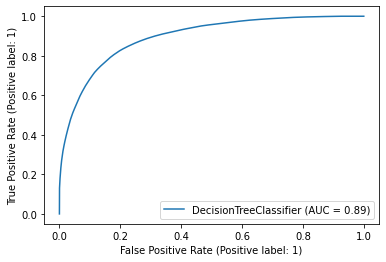

In [41]:
plot_roc_curve(treemodel,X,y)

RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
RF=RandomForestClassifier(n_estimators=1000,oob_score=True)

In [44]:
RFmodel=RF.fit(X,y)

In [45]:
RFmodel.score(X,y)

1.0

In [46]:
RFpredict=RFmodel.predict(X)

In [47]:
RFpredict

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
pd.crosstab(y,RFpredict)

col_0,0,1
seasonal_vaccine,,
0,14272,0
1,0,12435


GRADIENT BOOSTING MACHINES(GBM)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gbm=GradientBoostingClassifier(n_estimators=3000)

In [51]:
gbmmodel=gbm.fit(X,y)

In [52]:
gbmmodel.score(X,y)

0.8416520013479613

In [53]:
gbmpredict=gbmmodel.predict(X)

In [54]:
gbmpredict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
pd.crosstab(y,gbmpredict)

col_0,0,1
seasonal_vaccine,,
0,12214,2058
1,2171,10264


In [56]:
print(classification_report(y,gbmpredict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     14272
           1       0.83      0.83      0.83     12435

    accuracy                           0.84     26707
   macro avg       0.84      0.84      0.84     26707
weighted avg       0.84      0.84      0.84     26707



SUPPORT VECTOR MACHINES(SVM)

In [60]:
from sklearn.svm import SVC 

In [61]:
svm=SVC()

In [62]:
svmmodel=svm.fit(X,y)

In [63]:
svmmodel.score(X,y)

0.7804320964541132

In [64]:
svmpredict=svmmodel.predict(X)

In [65]:
svmpredict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [66]:
pd.crosstab(y,svmpredict)

col_0,0,1
seasonal_vaccine,,
0,11660,2612
1,3252,9183


In [67]:
print(classification_report(y,svmpredict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80     14272
           1       0.78      0.74      0.76     12435

    accuracy                           0.78     26707
   macro avg       0.78      0.78      0.78     26707
weighted avg       0.78      0.78      0.78     26707

